# 🏡 House Prices - Exploratory Data Analysis

> #### Check out my other cool notebooks !
> - [🛳️ Titanic - Top 1% with KNN [0.81818]](https://www.kaggle.com/code/dreygaen/titanic-top-1-with-knn-0-81818)
> - [🛳️ Titanic EDA and Prediction [0.78229]](https://www.kaggle.com/code/dreygaen/titanic-eda-and-prediction-0-78229)

# 📋 Table of contents

- [🎓 Context](#🎓-Context)
- [🛠️ Project Setup](#🛠️-Project-Setup)
- [💾 Loading Data](#💾-Loading-Data)
- [❓ Missing Values](#❓-Missing-Values)
- [🔍 Descriptive Statistics](#🔍-Descriptive-Statistics)
- [🎯 Target Value Visualization](#🎯-Target-Value-Visualization)
- [📊 Numerical Values Columns](#📊-Numerical-Values-Columns)
- [📊 Numerical Values Distribution](#📊-Numerical-Values-Distribution)
- [📊 Numerical Values Boxplots](#📊-Numerical-Values-Boxplots)
- [📊 Numerical Values Regplots](#📊-Numerical-Values-Regplots)
- [📊 Numerical Values Correlation Matrix](#📊-Numerical-Values-Correlation-Matrix)
- [📊 Categorical Values Columns](#📊-Categorical-Values-Columns)
- [❓ Handling Missing Categorical Values](#❓-Handling-Missing-Categorical-Values)
- [📊 Categorical Values Distribution](#📊-Categorical-Values-Distribution)
- [📊 Categorical Values Boxplots](#📊-Categorical-Values-Boxplots)
- [📊 Categorical Values Impact on the Target Value](#📊-Categorical-Values-Impact-on-the-Target-Value)
- [⚙️ Target Encoding Categorical Values](#⚙️-Target-Encoding-Categorical-Values)
- [📊 Pairplots of Numerical and Target Encoded Categorical Variables](#📊-Pairplots-of-Numerical-and-Target-Encoded-Categorical-Variables)
- [📊 Clustering and Dimensionality Reduction](#📊-Clustering-and-Dimensionality-Reduction)
- [📊 Feature Importance using a Random Forest Regressor](#📊-Feature-Importance-using-a-Random-Forest-Regressor)
- [📝 Note of the Author](#📝-Note-of-the-Author)

# 🎓 Context

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

![](https://storage.googleapis.com/kaggle-competitions/kaggle/5407/logos/thumb76_76.png)

# 🛠️ Project Setup

This code imports the necessary libraries and modules for data analysis and visualization, including **NumPy**, **Pandas**, **SciPy**, **Matplotlib**, **Seaborn**, **scikit-learn**, and **OS**. It also prints out the file paths of the datasets stored in the Kaggle input directory.

In [1]:
import numpy as np
import pandas as pd

from scipy import stats
from scipy.stats import norm

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


The **normal** function is a helper function used to plot a normal distribution curve with a given mean and standard deviation on a **matplotlib** axis (*plt*). The function takes in the mean, standard deviation, axis and color as arguments, and generates a normal distribution curve using **numpy** and **scipy.stats** libraries. The curve is then plotted on the specified axis with the given color. This function is used in the EDA process to compare the distribution of a numerical feature with a normal distribution.

In [2]:
def normal(mean, std, plt, mu, sigma, color="black"):
    x = np.linspace(mean-4*std, mean+4*std, 200)
    p = norm.pdf(x, mean, std)
    label = 'Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)
    z = plt.plot(x, p, color, linewidth=2, label=label)

# 💾 Loading Data

This code block reads in the training and test datasets for the Kaggle House Prices competition using the pandas **read_csv** function. The training dataset is stored in the *train_df* variable, while the test dataset is stored in the *test_df* variable. 

The datasets are then combined into a single dataframe called *data_df* using the **append** method. The **reset_index** function is then used to reset the index of the combined dataframe, so that the index values are sequential and unique. This is done by setting the **drop** parameter to **True**, which drops the old index values. 

Finally, the **inplace** parameter is set to **True**, which means that the original *data_df* dataframe is modified instead of creating a new one. This is an important step to ensure that subsequent operations on the dataframe are performed correctly.

In [3]:
train_df = pd.read_csv('../input/home-data-for-ml-course/train.csv') # load our training dataset
test_df = pd.read_csv('../input/home-data-for-ml-course/test.csv') # load our test dataset
data_df = train_df.append(test_df)
data_df.reset_index(drop=True, inplace=True)

This code block displays the first few rows of the *data_df* dataframe using the **head** function. By default, **head** displays the first 5 rows of the dataframe, but this can be changed by specifying a different number as an argument. This is a useful step to take when working with a new dataset, as it allows us to quickly inspect the data and get a sense of what it looks like. In this case, we can see the values of the various features for the first few properties in the dataset.

In [4]:
data_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal   208500.0  
1   2007        WD         Normal   181500.0  
2   2008        WD         Normal   223500.0  
3   2006        WD        Abnorml   140000.0  
4   2008        WD         Normal   250000.0  

[5 rows x 81 columns]

This code block prints out the shape of the *train_df*, *test_df*, and *data_df* dataframes using the **shape** attribute. The **shape** attribute returns a tuple with two values: the number of rows and the number of columns in the dataframe.

The first print statement shows the shape of the *train_df* dataframe, which contains the training data for the competition. The shape is printed in the format (number of rows, number of columns), indicating that the *train_df* dataframe has a total of **1460** rows and **81** columns.

The second print statement shows the shape of the *test_df* dataframe, which contains the test data for the competition. Similarly to the first statement, the shape is printed in the format (number of rows, number of columns), indicating that the *test_df* dataframe has a total of **1459** rows and **80** columns.

The third print statement shows the shape of the *data_df* dataframe, which is the combination of the *train_df* and *test_df* dataframes. The shape is printed in the format (number of rows, number of columns), indicating that the *data_df* dataframe has a total of **2919** rows and **81** columns. This step is useful to ensure that the data was read in correctly and that the datasets were correctly combined.

In [5]:
print('train_df : ', train_df.shape)
print('='*93)
print('test_df : ', test_df.shape)
print('='*93)
print('data_df : ', data_df.shape)

train_df :  (1460, 81)
test_df :  (1459, 80)
data_df :  (2919, 81)


The first print statement in this code block prints the column names of the *data_df* dataframe using the **columns.values** attribute. The columns attribute returns an **Index** object containing the column labels of the dataframe, while the **values** attribute returns a **numpy** array containing the actual labels. This step is useful to get an overview of the features available in the dataset.

The second print statement uses the info method to print a summary of the *data_df* dataframe, including information on the number of non-null values, data types, and memory usage of each column. This is a useful step to take when working with a new dataset, as it allows us to quickly identify any missing values or data types that need to be converted. In this case, we can see that some of the columns have missing values, and that some of the data types may need to be converted to a more appropriate format.

In [6]:
print(data_df.columns.values) # prints the columns names of our training dataset
print('='*93)
data_df.info() # prints the columns information of our training dataset

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

The *Id* column contains a unique identifier for each property in the dataset, but it is not useful for training a machine learning model. Therefore, it is a common practice to drop this column when working with this dataset. By dropping this column, we can reduce the memory usage of the dataframe and simplify subsequent data processing steps.

In [7]:
data_df.drop('Id', axis=1, inplace=True)

# ❓ Missing Values

This code block creates a bar plot of the missing values in the *data_df* dataframe using the **isnull** and **sum** methods to count the number of missing values for each column. The resulting series is then filtered using a boolean mask to keep only the columns with missing values, and sorted in ascending order by the number of missing values using the **sort_values** method. Finally, the resulting series is plotted using the **plot.bar** method from the matplotlib library.

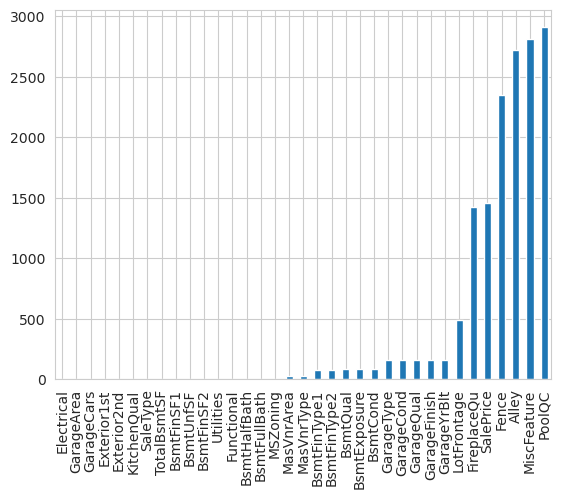

In [8]:
missing = data_df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
plt.show()

> **Analysis** : The resulting plot shows the number of missing values for each column in the dataset, ordered from least to most missing values. This is a useful step to take when working with a new dataset, as it allows us to quickly identify which features have missing values and how severe the problem is. In this case, we can see that 35 columns have missing values, with some having a relatively small number of missing values, such as *Electrical* or *GarageArea*, while others have a significant proportion of missing values, like *PoolQC* or *MiscFeature*. This information can be used to guide subsequent data cleaning and imputation steps.

# 🔍 Descriptive Statistics

This code block generates a summary of the numerical features in the *data_df* dataframe using the **describe** method. The resulting summary contains statistical information about the numerical columns in the dataset, including the count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values. 

This summary can be used to quickly identify any outliers, skewness, or other issues with the numerical columns in the dataset, and to guide subsequent data cleaning and feature engineering steps.

In [9]:
data_df.describe().transpose()

count           mean           std      min       25%  \
MSSubClass     2919.0      57.137718     42.517628     20.0      20.0   
LotFrontage    2433.0      69.305795     23.344905     21.0      59.0   
LotArea        2919.0   10168.114080   7886.996359   1300.0    7478.0   
OverallQual    2919.0       6.089072      1.409947      1.0       5.0   
OverallCond    2919.0       5.564577      1.113131      1.0       5.0   
YearBuilt      2919.0    1971.312778     30.291442   1872.0    1953.5   
YearRemodAdd   2919.0    1984.264474     20.894344   1950.0    1965.0   
MasVnrArea     2896.0     102.201312    179.334253      0.0       0.0   
BsmtFinSF1     2918.0     441.423235    455.610826      0.0       0.0   
BsmtFinSF2     2918.0      49.582248    169.205611      0.0       0.0   
BsmtUnfSF      2918.0     560.772104    439.543659      0.0     220.0   
TotalBsmtSF    2918.0    1051.777587    440.766258      0.0     793.0   
1stFlrSF       2919.0    1159.581706    392.362079    334.0     876.0   
2ndFlrSF       2919.0     336.483727    428.701456      0.0       0.0   
LowQualFinSF   2919.0       4.694416     46.396825      0.0       0.0   
GrLivArea      2919.0    1500.759849    506.051045    334.0    1126.0   
BsmtFullBath   2917.0       0.429894      0.524736      0.0       0.0   
BsmtHalfBath   2917.0       0.061364      0.245687      0.0       0.0   
FullBath       2919.0       1.568003      0.552969      0.0       1.0   
HalfBath       2919.0       0.380267      0.502872      0.0       0.0   
BedroomAbvGr   2919.0       2.860226      0.822693      0.0       2.0   
KitchenAbvGr   2919.0       1.044536      0.214462      0.0       1.0   
TotRmsAbvGrd   2919.0       6.451524      1.569379      2.0       5.0   
Fireplaces     2919.0       0.597122      0.646129      0.0       0.0   
GarageYrBlt    2760.0    1978.113406     25.574285   1895.0    1960.0   
GarageCars     2918.0       1.766621      0.761624      0.0       1.0   
GarageArea     2918.0     472.874572    215.394815      0.0     320.0   
WoodDeckSF     2919.0      93.709832    126.526589      0.0       0.0   
OpenPorchSF    2919.0      47.486811     67.575493      0.0       0.0   
EnclosedPorch  2919.0      23.098321     64.244246      0.0       0.0   
3SsnPorch      2919.0       2.602261     25.188169      0.0       0.0   
ScreenPorch    2919.0      16.062350     56.184365      0.0       0.0   
PoolArea       2919.0       2.251799     35.663946      0.0       0.0   
MiscVal        2919.0      50.825968    567.402211      0.0       0.0   
MoSold         2919.0       6.213087      2.714762      1.0       4.0   
YrSold         2919.0    2007.792737      1.314964   2006.0    2007.0   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.0   

                    50%       75%       max  
MSSubClass         50.0      70.0     190.0  
LotFrontage        68.0      80.0     313.0  
LotArea          9453.0   11570.0  215245.0  
OverallQual         6.0       7.0      10.0  
OverallCond         5.0       6.0       9.0  
YearBuilt        1973.0    2001.0    2010.0  
YearRemodAdd     1993.0    2004.0    2010.0  
MasVnrArea          0.0     164.0    1600.0  
BsmtFinSF1        368.5     733.0    5644.0  
BsmtFinSF2          0.0       0.0    1526.0  
BsmtUnfSF         467.0     805.5    2336.0  
TotalBsmtSF       989.5    1302.0    6110.0  
1stFlrSF         1082.0    1387.5    5095.0  
2ndFlrSF            0.0     704.0    2065.0  
LowQualFinSF        0.0       0.0    1064.0  
GrLivArea        1444.0    1743.5    5642.0  
BsmtFullBath        0.0       1.0       3.0  
BsmtHalfBath        0.0       0.0       2.0  
FullBath            2.0       2.0       4.0  
HalfBath            0.0       1.0       2.0  
BedroomAbvGr        3.0       3.0       8.0  
KitchenAbvGr        1.0       1.0       3.0  
TotRmsAbvGrd        6.0       7.0      15.0  
Fireplaces          1.0       1.0       4.0  
GarageYrBlt      1979.0    2002.0    2207.0  
GarageCars          2.0       2.0       5.0  

> **Analysis** : Here are some observations from the provided output :
>
>    - The mean *LotArea* is approximately **10168** square feet and the median (50%) is **9453** square feet. The range of values for *LotArea* varies from **1300** to **215245** square feet.
>    - The mean *OverallQual* is approximately **6**, indicating an above average quality of houses in the dataset. The scale of *OverallQual* ranges from **1** to 10**.
>    - The mean *YearBuilt* is approximately **1971** and the median is **1973**, which indicates that most of the houses in the dataset are relatively old.
>    - The mean *GrLivArea* is approximately **1501** square feet with a median of **1444** square feet. The maximum value of *GrLivArea* is **5642** square feet, which is quite large compared to the other values in the dataset.
>    - The majority of the *GarageYrBlt* values fall between the years **1960** and **2002**, with a mean of **1978.11** and a median of **1979**.
>    - The mean value of *GarageCars* is **1.766621**, indicating that, on average, the houses in the dataset have slightly less than 2 cars capacity for their garages.
>    - There are some features where the mean and median (50%) values are relatively close, indicating that the distribution of values may be approximately symmetric (e.g. *GrLivArea*).
>    
>   Overall, the provided output provides a general understanding of the numerical features in the dataset.

This block of code uses the describe method on the DataFrame *data_df* with the argument **include=['O']** to compute summary statistics of the categorical variables in the dataset. The **transpose()** method is then called to swap the rows and columns of the resulting DataFrame for better readability. This will provide information on the count, unique values, top occurrence, and frequency of the most frequent category in each categorical variable in the dataset.

In [10]:
data_df.describe(include=['O']).transpose()

count unique      top  freq
MSZoning       2915      5       RL  2265
Street         2919      2     Pave  2907
Alley           198      2     Grvl   120
LotShape       2919      4      Reg  1859
LandContour    2919      4      Lvl  2622
Utilities      2917      2   AllPub  2916
LotConfig      2919      5   Inside  2133
LandSlope      2919      3      Gtl  2778
Neighborhood   2919     25    NAmes   443
Condition1     2919      9     Norm  2511
Condition2     2919      8     Norm  2889
BldgType       2919      5     1Fam  2425
HouseStyle     2919      8   1Story  1471
RoofStyle      2919      6    Gable  2310
RoofMatl       2919      8  CompShg  2876
Exterior1st    2918     15  VinylSd  1025
Exterior2nd    2918     16  VinylSd  1014
MasVnrType     2895      4     None  1742
ExterQual      2919      4       TA  1798
ExterCond      2919      5       TA  2538
Foundation     2919      6    PConc  1308
BsmtQual       2838      4       TA  1283
BsmtCond       2837      4       TA  2606
BsmtExposure   2837      4       No  1904
BsmtFinType1   2840      6      Unf   851
BsmtFinType2   2839      6      Unf  2493
Heating        2919      6     GasA  2874
HeatingQC      2919      5       Ex  1493
CentralAir     2919      2        Y  2723
Electrical     2918      5    SBrkr  2671
KitchenQual    2918      4       TA  1492
Functional     2917      7      Typ  2717
FireplaceQu    1499      5       Gd   744
GarageType     2762      6   Attchd  1723
GarageFinish   2760      3      Unf  1230
GarageQual     2760      5       TA  2604
GarageCond     2760      5       TA  2654
PavedDrive     2919      3        Y  2641
PoolQC           10      3       Ex     4
Fence           571      4    MnPrv   329
MiscFeature     105      4     Shed    95
SaleType       2918      9       WD  2525
SaleCondition  2919      6   Normal  2402

> **Analysis** : This result shows the count, unique values, top value, and frequency of the categorical features of the house prices dataset. It provides a summary of the distribution of the categorical data in the dataset. For instance, there are **5** unique values for the *MSZoning* feature, with **RL** being the top value and occurring **2265** times. Similarly, **VinylSd** is the most frequent value for both the *Exterior1st* and *Exterior2nd* features, with **1025** and **1014** occurrences respectively.

# 🎯 Target Value Visualization

This block of code creates a histogram using the **seaborn** library to visualize the distribution of the *SalePrice* feature in the dataset. The x-axis represents the *SalePrice* values and the y-axis represents the frequency or count of the *SalePrice* values. The **kde** parameter is set to **True** to show a Kernel Density Estimate plot superimposed on top of the histogram. This visualization can help to identify if the *SalePrice* is normally distributed or if there are any outliers.

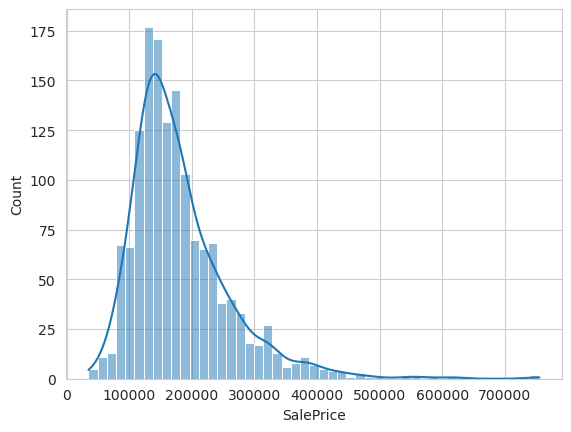

In [11]:
sns.histplot(data=data_df, x='SalePrice', kde=True)
plt.show()

> **Analysis** : We can see here that *SalePrice* doesn't follow a normal distribution.

This code creates a DataFrame that summarizes the descriptive statistics of the *SalePrice* column in the *train_df* DataFrame. The **describe()** method computes the count, mean, standard deviation, minimum value, 25th percentile, median (50th percentile), 75th percentile, and maximum value of the *SalePrice* column. The **T** attribute is used to transpose the resulting DataFrame so that the descriptive statistics are displayed as row instead of column.

In [12]:
pd.DataFrame(train_df['SalePrice'].describe()).T

count          mean           std      min       25%       50%  \
SalePrice  1460.0  180921.19589  79442.502883  34900.0  129975.0  163000.0   

                75%       max  
SalePrice  214000.0  755000.0

> **Analysis** : 
> - The **count** shows that there are **1460** entries in the *SalePrice* column, indicating that there are no missing values in this column.
>
> - The **mean** and **std values** indicate the average and the spread of the sale prices respectively. The mean sale price is approximately **180921.20** and the standard deviation is approximately **79442.50**.
>
> - The min and max values show the minimum and maximum sale prices, which are **34900** and **755000**, respectively.
>
>- The 25%, 50%, and 75% values represent the first quartile (Q1), the median (Q2), and the third quartile (Q3) respectively. The median sale price is **163000**, and the range between the first and third quartiles is **129975** to **214000**.

This block of code creates two subplots to visualize the distribution of the target variable *SalePrice*.

The first subplot is a histogram of the *SalePrice* variable overlaid with a normal distribution fit to the data. The **norm.fit()** function is used to estimate the parameters of the normal distribution (mean and standard deviation) that best fits the data. The function **normal()** is used to plot the normal distribution. The legend displays the values of the estimated mean and standard deviation.

The second subplot is a QQ-plot of *SalePrice*. The **probplot()** function from the **scipy.stats** module is used to generate the QQ-plot. A QQ-plot is a graphical method to check whether a dataset follows a specific distribution, in this case, a normal distribution. If the points on the QQ-plot form a straight line, then the data are normally distributed.

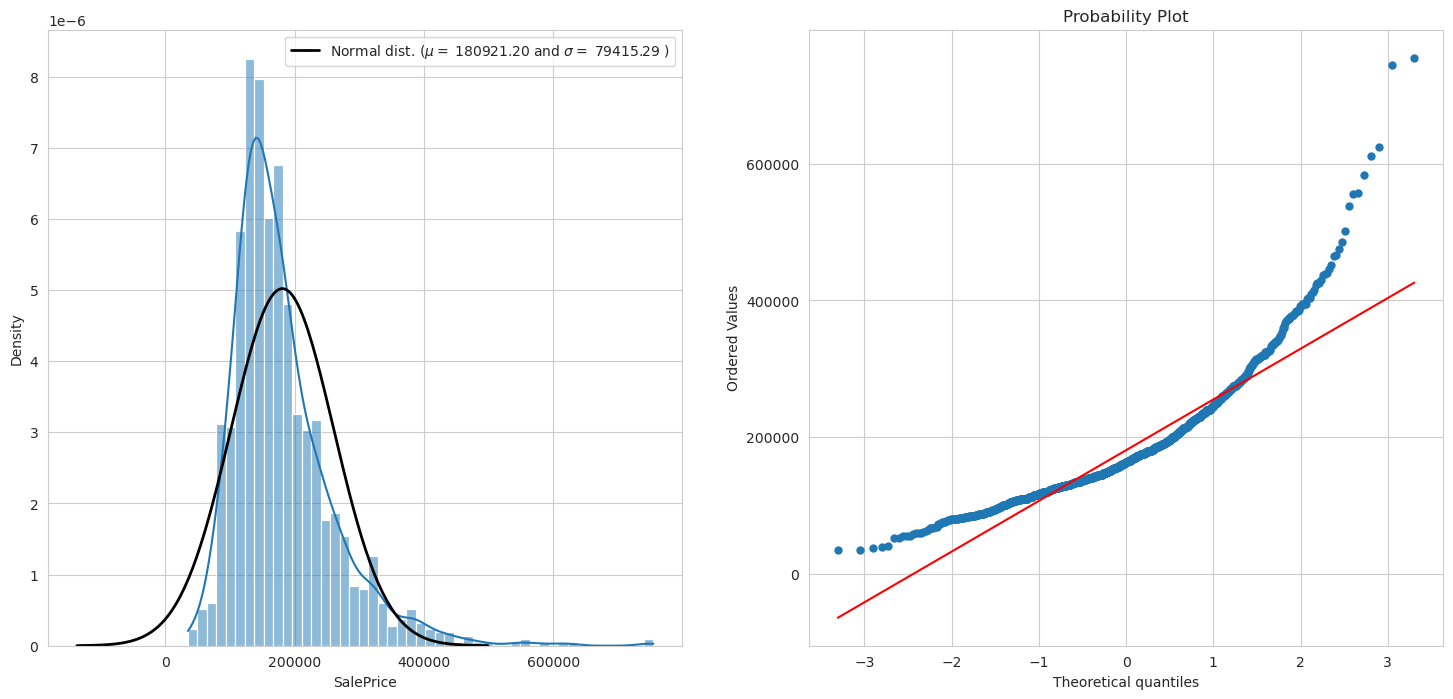

In [13]:
(mu, sigma) = norm.fit(train_df['SalePrice'])

f,ax=plt.subplots(1,2,figsize=(18,8))

sns.histplot(data=data_df, x='SalePrice', kde=True, stat='density', ax=ax[0])
normal(data_df['SalePrice'].mean(), data_df['SalePrice'].std(), ax[0], mu, sigma)
ax[0].legend()

stats.probplot(train_df['SalePrice'], plot=ax[1])
ax[1].get_lines()[0].set_markerfacecolor(sns.color_palette()[0])
ax[1].get_lines()[0].set_markeredgecolor('none')
plt.show()

> **Analysis** : As we saw just above, our *SalePrice* feature isn't normally distributed because it is positively skewed. This means that the mean is greater than the median, and the bulk of the data is concentrated on the left side of the plot. The tail on the right side represents the outliers or extreme values in the data. 

# 📊 Numerical Values Columns

This code selects only the numerical columns in the *data_df* DataFrame and creates a new DataFrame called *df_num* that contains only these columns. The **select_dtypes** method is used with the **include** parameter set to a list of numerical data types ('float64' and 'int64') to select the desired columns. The **copy()** method is used to create a copy of the resulting DataFrame to avoid modifying the original *data_df* DataFrame. The **head()** method is then used to display the first few rows of the *df_num* DataFrame.

In [14]:
df_num = data_df.select_dtypes(include = ['float64', 'int64']).copy()
df_num.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0       706.0         0.0  ...           0   
1          1976         0.0       978.0         0.0  ...         298   
2          2002       162.0       486.0         0.0  ...           0   
3          1970         0.0       216.0         0.0  ...           0   
4          2000       350.0       655.0         0.0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008   208500.0  
1       5    2007   181500.0  
2       9    2008   223500.0  
3       2    2006   140000.0  
4      12    2008   250000.0  

[5 rows x 37 columns]

> **Analysis** : We can see that our dataset contains 37 numerical columns : *MSSubClass*, *LotFrontage*, *LotArea*, *OverallQual*, *OverallCond*, *YearBuilt*, *YearRemodAdd*, *MasVnrArea*, *BsmtFinSF1*, *BsmtFinSF2*, *BsmtUnfSF*, *TotalBsmtSF*, *1stFlrSF*, *2ndFlrSF*, *LowQualFinSF*, *GrLivArea*, *BsmtFullBath*, *BsmtHalfBath*, *FullBath*, *HalfBath*, *BedroomAbvGr*, *KitchenAbvGr*, *TotRmsAbvGrd*, *Fireplaces*, *GarageYrBlt*, *GarageCars*, *GarageArea*, *WoodDeckSF*, *OpenPorchSF*, *EnclosedPorch*, *3SsnPorch*, *ScreenPorch*, *PoolArea*, *MiscVal*, *MoSold*, *YrSold* and the target value *SalePrice*

# 📊 Numerical Values Distribution

This block of code creates a grid of subplots with 9 rows and 4 columns to display histograms of the numerical features in the dataset. It first selects the numerical columns using **select_dtypes** method and drops the target variable *SalePrice*. It then loops over each numerical column, plots a histogram using **sns.histplot** with a kernel density estimate and adds it to the corresponding subplot in the grid. The resulting plot provides a quick visual summary of the distribution of each numerical feature in the dataset.

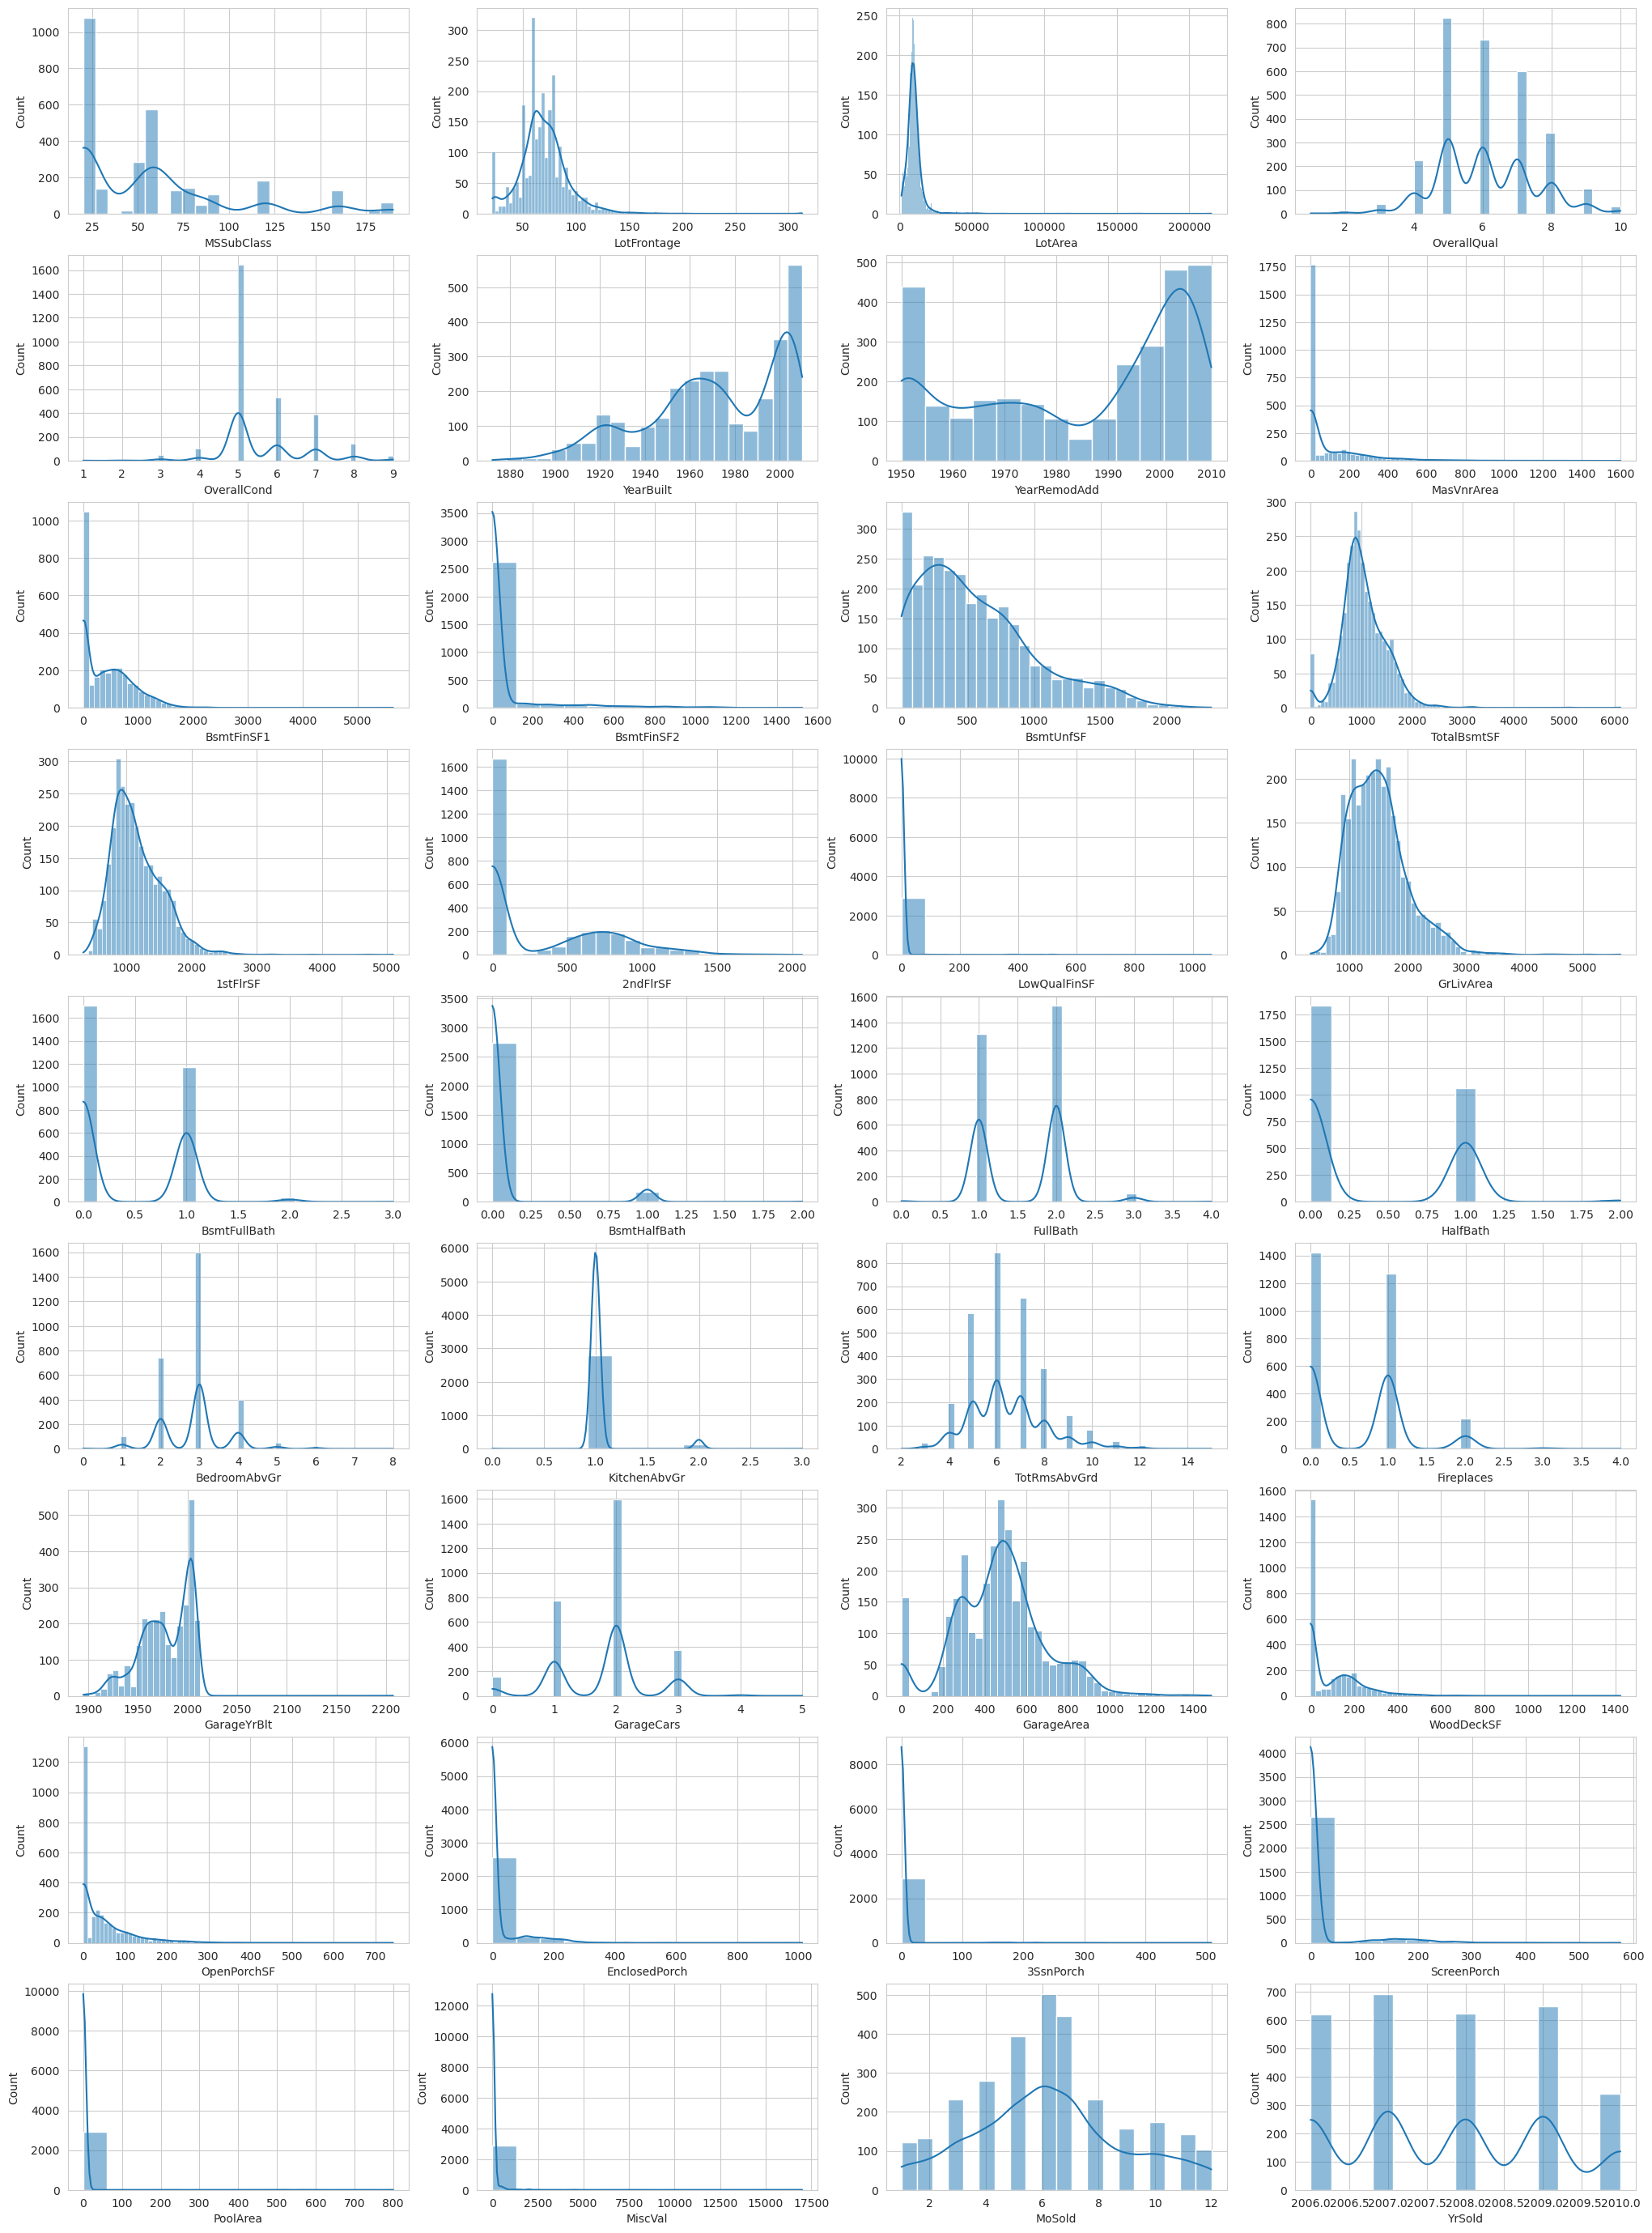

In [15]:
f,ax = plt.subplots(9,4,figsize=(25, 35))

num_cols = df_num.columns
num_cols = num_cols.drop('SalePrice')

for i, col in enumerate(num_cols):
        sns.histplot(data=df_num, x=col, kde=True, ax=ax[i//4,i%4])

plt.show()

> **Analysis** : Some independent variables look like good candidates for log transformation like *LotFrontage*, *LotArea*, *GrLivArea* and others, because they are highly skewed or have a large range of values. It will help to normalize the distribution of the data and reduce the impact of extreme values.
>
> However, there are some irregularities, such as a large number of houses with 0 *2ndFlrSF*. It may be important to the model and should not be smoothed out by the transformation. Instead, we could use them for feature construction, where new features are created based on the existing ones to capture additional information that could be useful for the model.

# 📊 Numerical Values Boxplots

This code block creates a set of boxplots to visualize the relationship between numerical features and the target variable *SalePrice*. The numerical columns to be visualized are stored in the *box_cols* list.

For each numerical feature, a boxplot is created showing the distribution of *SalePrice* values for each possible value of the numerical feature. The y-axis represents the *SalePrice* values and the x-axis represents the numerical feature values. The boxes represent the interquartile range (IQR) and the median value, while the whiskers represent the range of data outside of the IQR. Outliers are shown as individual points.

By analyzing the boxplots, we can see the relationship between each numerical feature and *SalePrice*. 

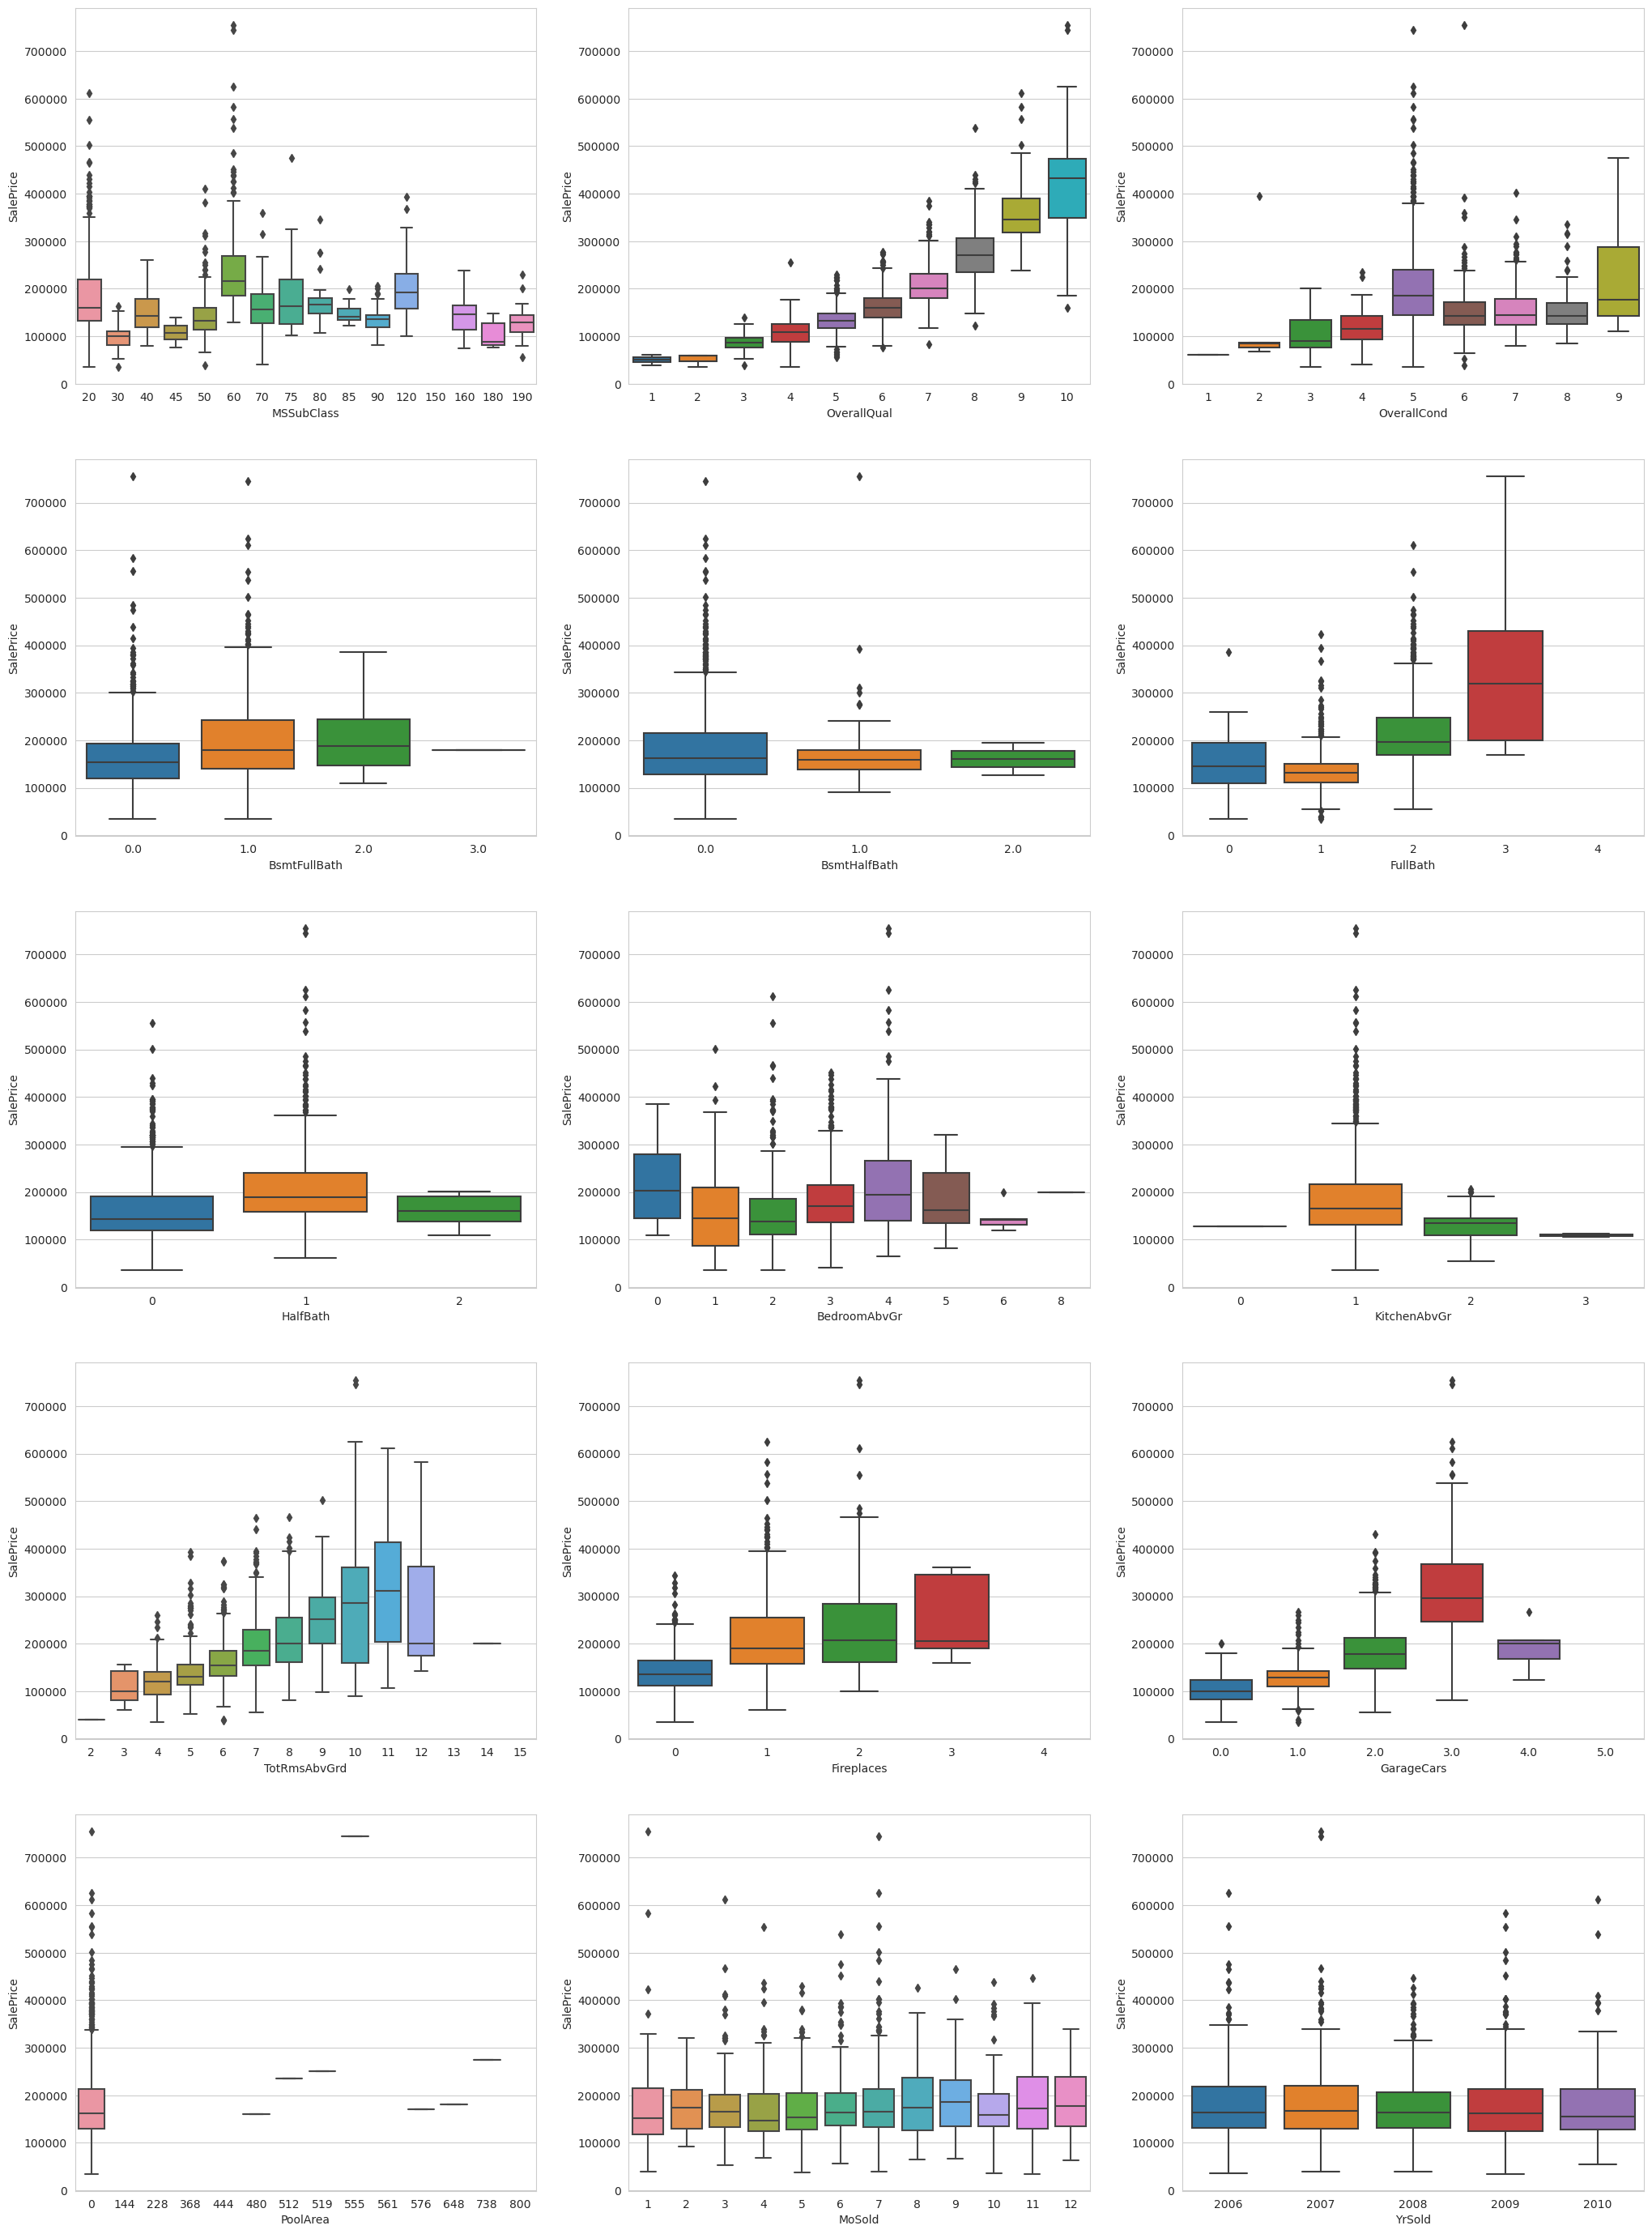

In [16]:
box_cols = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold', 'YrSold']

# Reshape the dataframe for boxplot visualization
# f = pd.melt(data_df, id_vars=['SalePrice'], value_vars=cat_cols)

# Plot multiple boxplots grouped by the categorical variable
fig, ax = plt.subplots(5, 3, figsize=(25, 35))

for i, col in enumerate(box_cols):
    sns.boxplot(data=df_num, x=col, y='SalePrice', ax=ax[i//3, i%3])

plt.show()

> **Analysis** : We can see that the *OverallQual*, *GarageCars* and *Fireplaces* features have a positive relationship with *SalePrice*, while *MoSold* and *YrSold* do not seem to have a strong relationship with *SalePrice*. But we will confirm this thanks to their scatter plots.

# 📊 Numerical Values Regplots

This code block creates a 9x4 grid of subplots to display scatter plots between each numerical feature and the target variable *SalePrice*. The numerical features are obtained from the *df_num* dataframe which includes all the numerical columns of the dataset. The **regplot** function from Seaborn is used to create each scatter plot, with the numerical feature plotted on the x-axis and the target variable *SalePrice* on the y-axis. The resulting scatter plots can be used to visualize the relationship between each numerical feature and the target variable, and to identify potential correlations or patterns in the data.

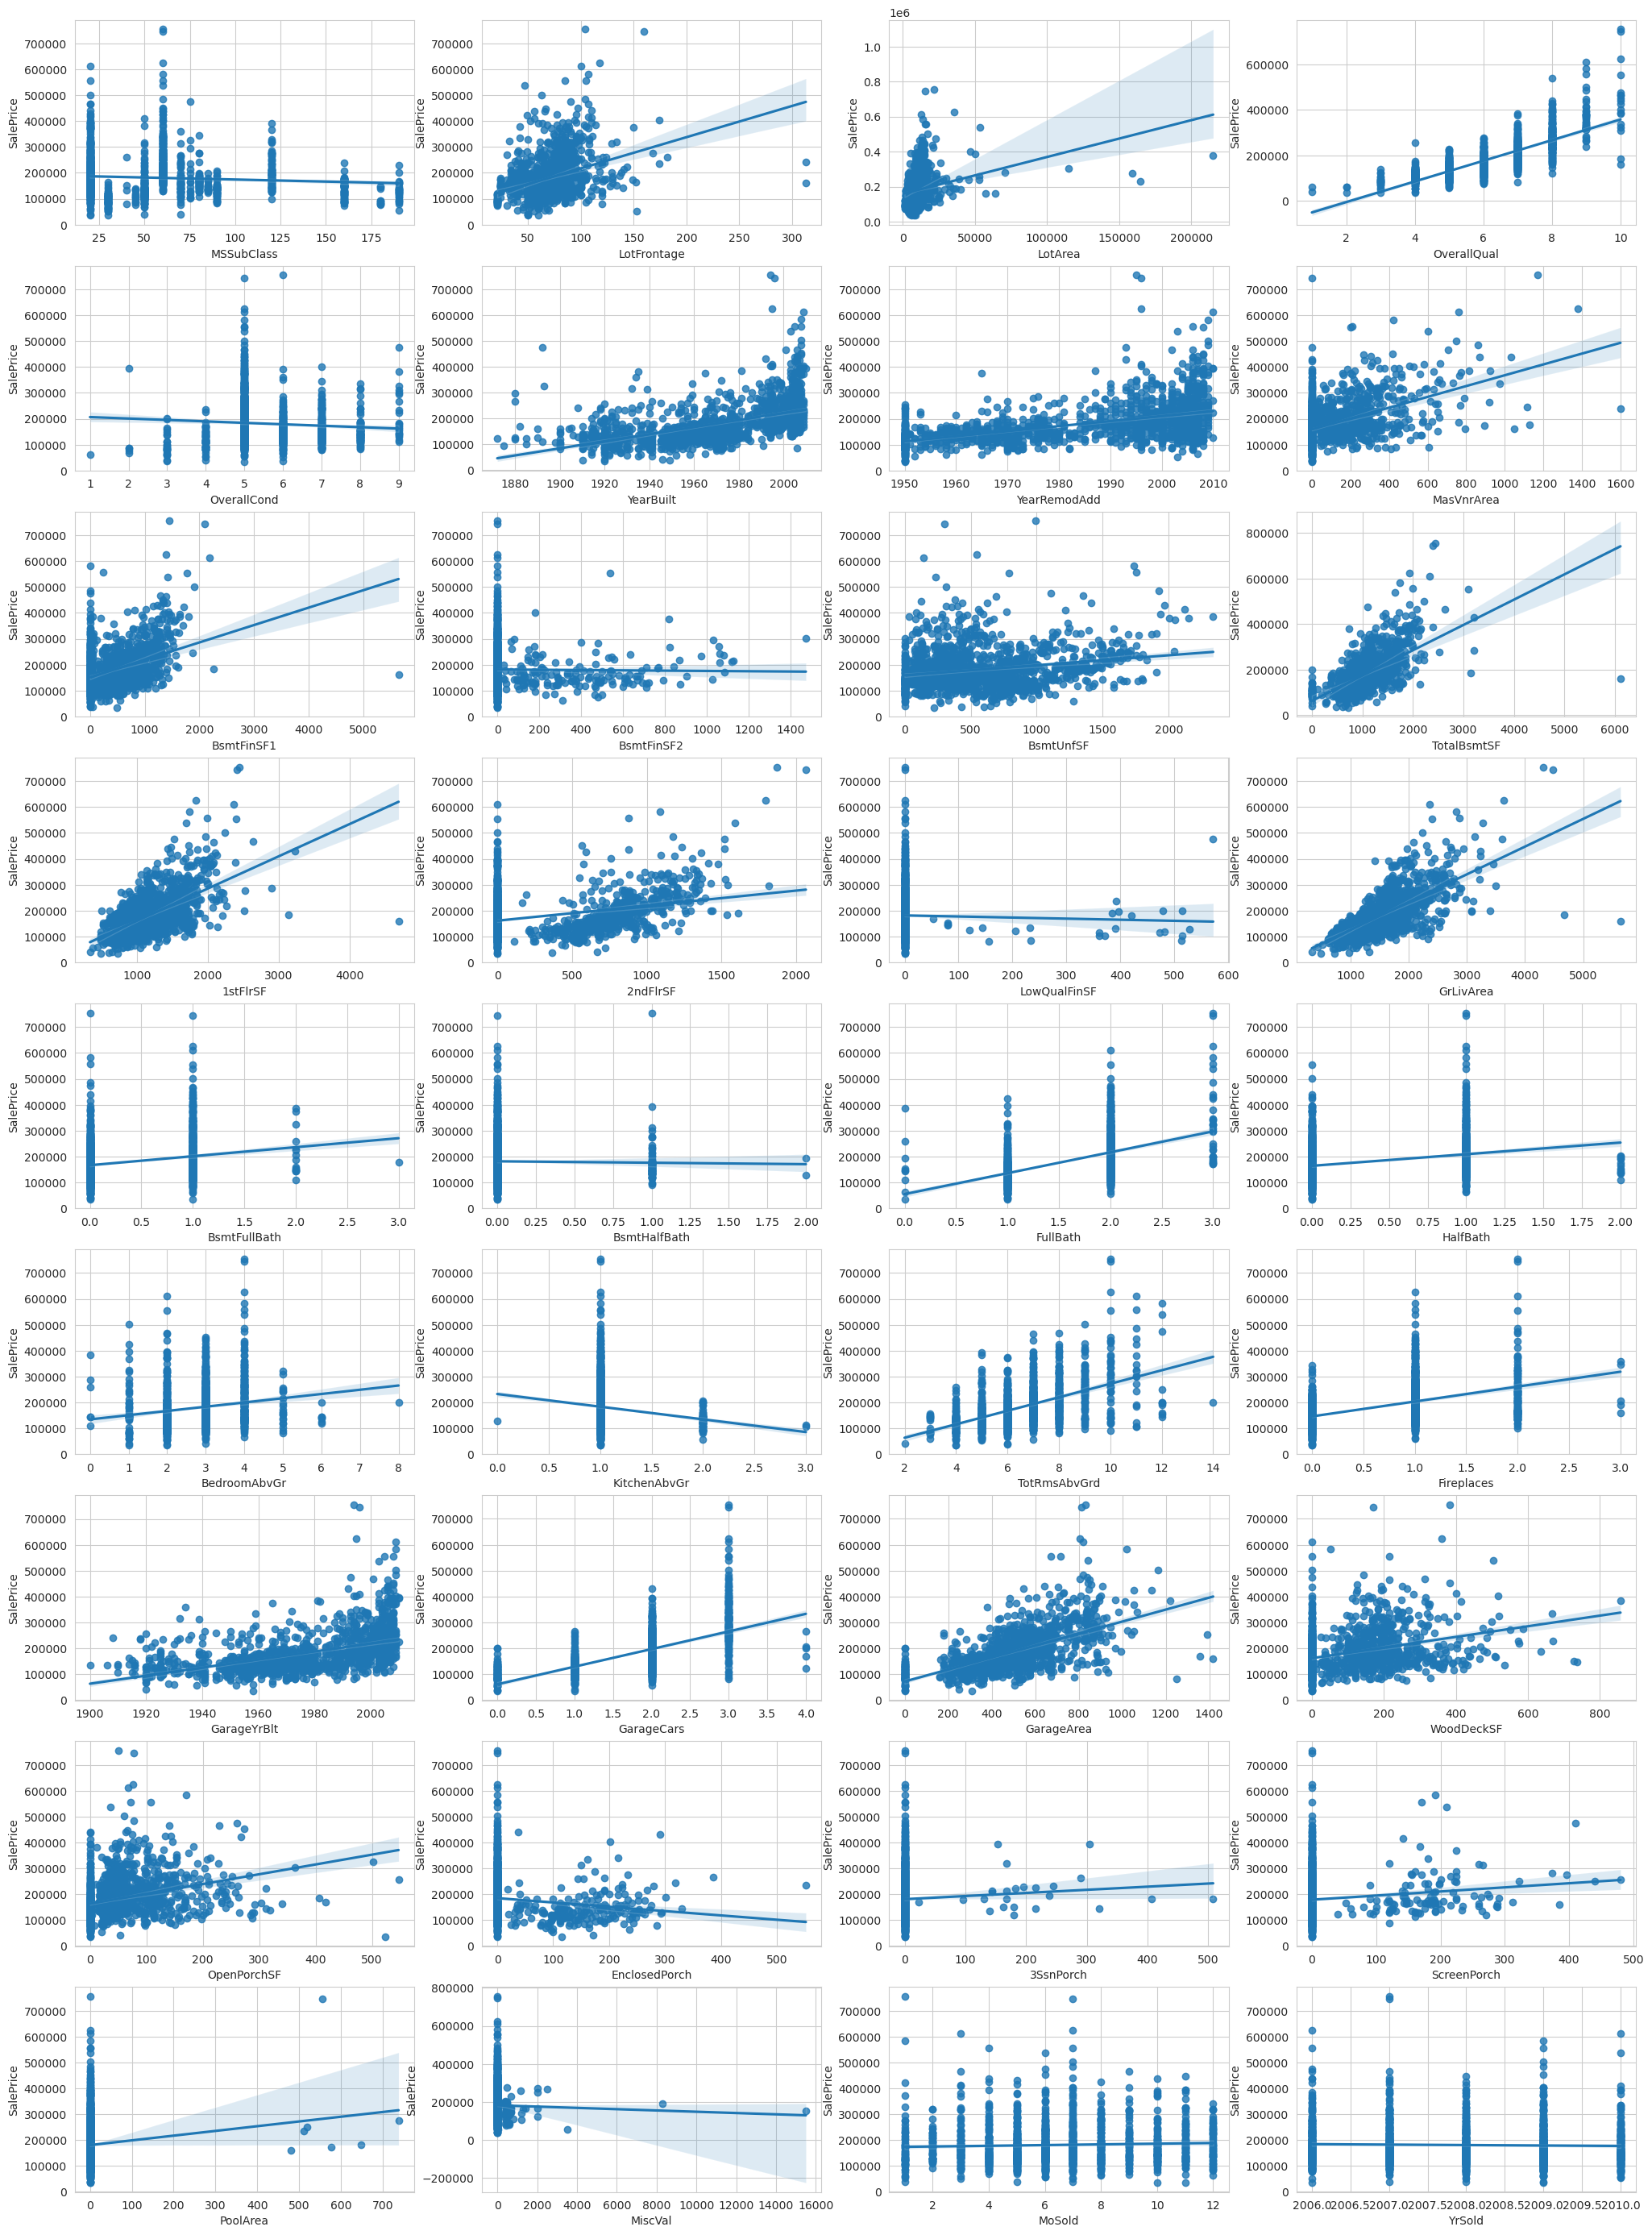

In [17]:
f,ax = plt.subplots(9,4,figsize=(25, 35))

for i, col in enumerate(num_cols):
        sns.regplot(data=df_num, x=col, y='SalePrice', ax=ax[i//4,i%4])

plt.show()

> **Analysis** : Here are some observations from the provided output :
>
> - *LotFrontage*, *LotArea*, *OverallQual*, *YearBuilt*, *YearRemodAdd*, *MasVnrArea*, *BsmtFinSF1*, *BsmtUnfSF*, *TotalBsmtSF*, *1stFlrSF*, *2ndFlrSF*, *GrLivArea*, *BsmtFullBath*, *FullBath*, *HalfBath*, *BedroomAbvGr*, *TotRmsAbvGrd*, *Fireplaces*, *GarageYrBlt*, *GarageCars*, *GarageArea*, *WoodDeckSF*, *OpenPorchSF*, *3SsnPorch*, *ScreenPorch* and *PoolArea* are positively correlated with *SalePrice*.
>
> - *MSSubClass*, *OverallCond*, *BsmtFinSF2*, *LowQualFinSF*, *BsmtHalfBath*, *KitchenAbvGr*, *EnclosedPorch* and  *MiscVal* are negatively correlated with *SalePrice*.
>
> - *MoSold* and *YrSold* are not correlated with *SalePrice*.
>
> - We can also identify outliers for some features, such as *LotArea* and *TotalBsmtSF*, which may need to be addressed during data cleaning or preprocessing.

# 📊 Numerical Values Correlation Matrix

This code computes the correlation matrix of the numerical features with respect to the target variable *SalePrice* using the Pearson correlation coefficient. It then sorts the correlations in descending order, selects only the highly correlated features with an absolute correlation value greater than **0.5**, and creates a new correlation matrix. Finally, it visualizes the correlation matrix using a heatmap, with annotations indicating the correlation values between the features. The diagonal of the matrix is colored in red to emphasize the correlation values between each feature and *SalePrice*.

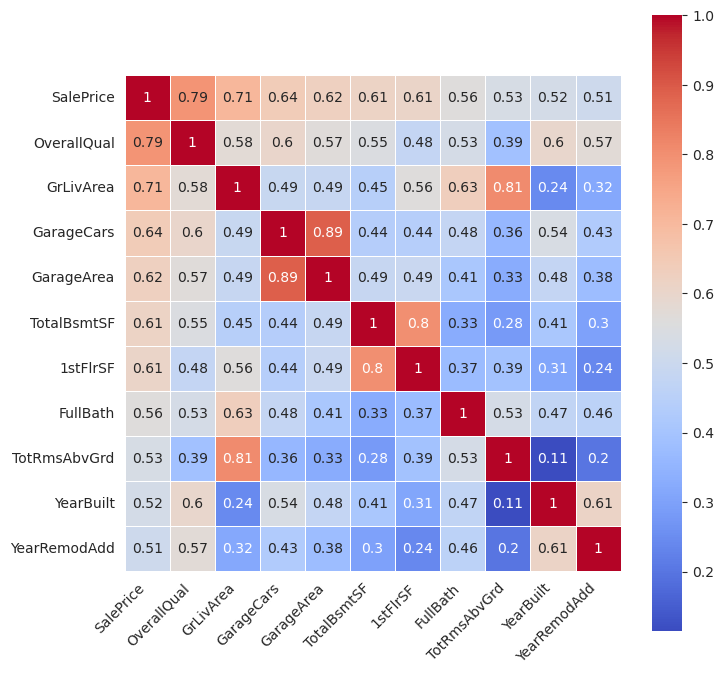

In [18]:
# compute the correlation matrix
cor_numVar = df_num.corr(method='pearson')

# sort on decreasing correlations with SalePrice
cor_sorted = cor_numVar['SalePrice'].sort_values(ascending=False)

# select only high correlations
CorHigh = cor_sorted[abs(cor_sorted) > 0.5].index
cor_numVar = cor_numVar.loc[CorHigh, CorHigh]

# plot the correlation matrix
plt.figure(figsize=(8,8))
corrplot = sns.heatmap(cor_numVar, annot=True, cmap='coolwarm', square=True, linewidths=0.5, linecolor='white')
corrplot.set_xticklabels(corrplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

> **Analysis** : We have 10 numerical columns highly correlated (> 0.5) with our target value *SalePrice* : *OverallQual*, *GrLivArea*, *GarageCars*, *GarageArea*, *TotalBsmtSF*, *1stFlrSF*, *FullBath*, *TotRmsAbvGrd*, *YearBuilt*, *YearRemodAdd*.

# 📊 Categorical Values Columns

This code block selects only the categorical columns from the dataset using the Pandas **select_dtypes** method. The method **include=['O']** specifies that only object columns (i.e. columns containing strings) should be selected. The resulting dataframe df_cat only contains the categorical columns of the original dataset, and *cat_cols* is a list containing the names of all the categorical columns. Finally, **df_cat.head()** is used to display the first five rows of the df_cat dataframe.

In [19]:
df_cat = data_df.select_dtypes(include = ['O']).copy()
cat_cols = df_cat.columns
df_cat.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

> **Analysis** : We can see that our dataset contains 43 categorical columns : *MSZoning*, *Street*, *Alley*, *LotShape*, *LandContour*, *Utilities*, *LotConfig*, *LandSlope*, *Neighborhood*, *Condition1*, *Condition2*, *BldgType*, *HouseStyle*, *RoofStyle*, *RoofMatl*, *Exterior1st*, *Exterior2nd*, *MasVnrType*, *ExterQual*, *ExterCond*, *Foundation*, *BsmtQual*, *BsmtCond*, *BsmtExposure*, *BsmtFinType1*, *BsmtFinType2*, *Heating*, *HeatingQC*, *CentralAir*, *Electrical*, *KitchenQual', *Functional*, *FireplaceQu*, *GarageType*, *GarageFinish*, *GarageQual*, *GarageCond*, *PavedDrive*, *PoolQC*, *Fence*, *MiscFeature*, *SaleType* and *SaleCondition*

# ❓ Handling Missing Categorical Values

This code returns the number of missing values in each column of the categorical (object) columns of the dataframe *train_df*. It uses the **isna()** method to check for missing values and the **sum()** method to count the number of **True** values (which represent missing values) for each column. The output will show the number of missing values for each categorical column.

In [20]:
train_df[cat_cols].isna().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

This code block converts all the categorical columns in the *df_cat* dataframe to category type and does the same for the corresponding columns in the *train_df* dataframe. If any missing values are found in a categorical column of *df_cat*, the code adds a new category named **Unknown** to the column, fills in the missing values with this new category, and also makes the same changes to the corresponding column in *train_df*. This is done to ensure that there are no missing values in the categorical columns, which could cause issues during analysis or modeling.

In [21]:
for col in cat_cols:
    df_cat[col] = df_cat[col].astype('category')
    train_df[col] = train_df[col].astype('category')
    if df_cat[col].isnull().any():
        df_cat[col] = df_cat[col].cat.add_categories(['Unknown'])
        train_df[col] = train_df[col].cat.add_categories(['Unknown'])
        df_cat[col] = df_cat[col].fillna('Unknown')
        train_df[col] = train_df[col].fillna('Unknown')

This outputs once again a **Series** where each column name represents a categorical variable and the corresponding value represents the number of missing values for that variable in the *train_df* dataframe. Since we've previously handled missing values by replacing them with the category **Unknown**, we should expect all values in the **Series** to be 0.

In [22]:
train_df[cat_cols].isna().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

# 📊 Categorical Values Distribution

This block of code creates a set of subplots using the *cat_cols* categorical variables from the dataset. For each categorical variable, the count of the number of occurrences for each category is plotted using a bar chart. The x-axis of each plot shows the categories of the categorical variable and the y-axis shows the count of occurrences. The last two subplots are removed using the **set_axis_off** function since they are empty. The resulting figure gives an idea of the distribution of each categorical variable in the dataset.

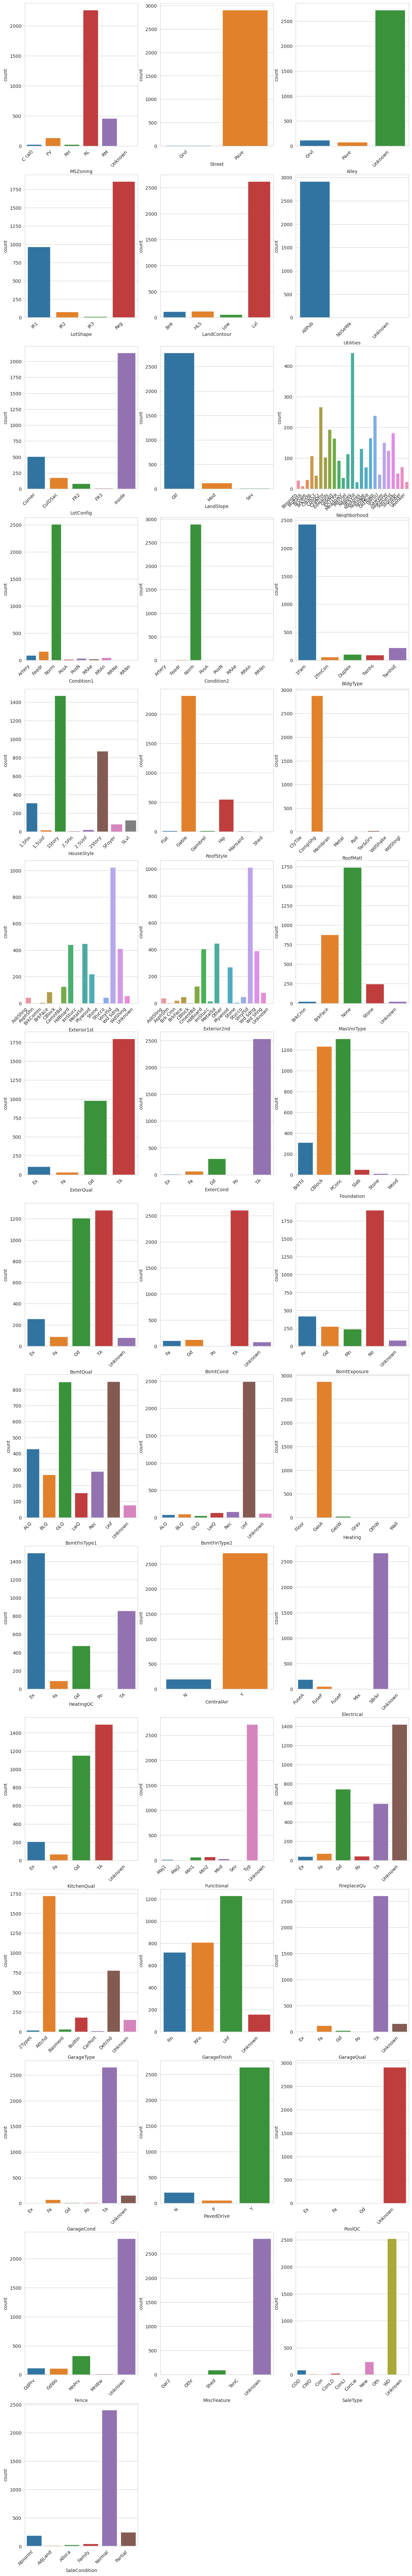

In [23]:
f,ax = plt.subplots(15,3,figsize=(15, 100))

for i, col in enumerate(cat_cols):
        sns.countplot(data=df_cat, x=col, ax=ax[i//3,i%3])
        ax[i//3, i%3].set_xticklabels(ax[i//3, i%3].get_xticklabels(), rotation=45, horizontalalignment='right')

ax[14, 1].set_axis_off()
ax[14, 2].set_axis_off()
plt.show()

> **Analysis** : A lot of those categorical features are not equally distributed and contains one category in huge majority in face of the others. This observation suggests that some categorical features may not have significant predictive power in determining the target variable (*SalePrice*) since the majority of the data points belong to a single category. This could be an indication that these features may not be useful in the modeling process and may need to be dropped.

# 📊 Categorical Values Boxplots

This code generates boxplots to visualize the relationship between each categorical variable and the target variable *SalePrice*. The code first reshapes the *train_df* dataframe using **pd.melt** function to create a new dataframe with categorical variables in a single column and their corresponding values in another column. 

Then, for each categorical variable, a boxplot is generated with **sns.boxplot**. The boxplot shows the distribution of *SalePrice* for each unique value of the categorical variable. The x-axis displays the unique values of the categorical variable, and the y-axis displays the distribution of *SalePrice* for each unique value. The box represents the interquartile range (IQR), the line inside the box represents the median, the whiskers extend to the minimum and maximum values within 1.5 times the IQR from the box, and the circles outside the whiskers represent the outliers. 

By visualizing these boxplots, we can get a sense of how each categorical variable affects the target variable *SalePrice*.

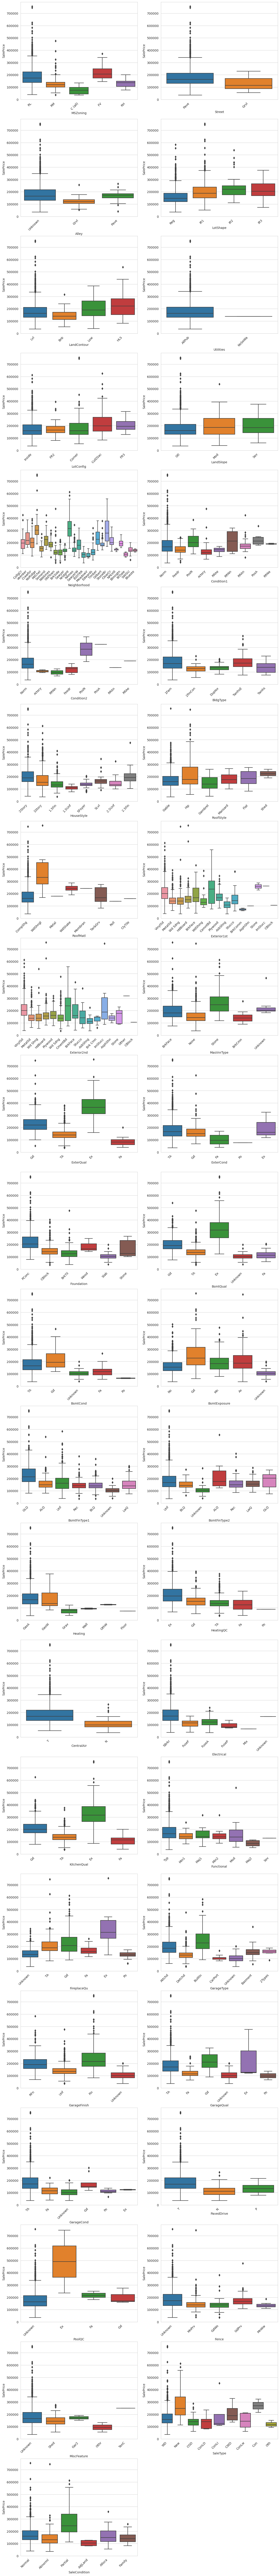

In [24]:
# Reshape the dataframe for boxplot visualization
f = pd.melt(train_df, id_vars=['SalePrice'], value_vars=cat_cols)

# Plot multiple boxplots grouped by the categorical variable
fig, ax = plt.subplots(22, 2, figsize=(15, 150))

for i, col in enumerate(cat_cols):
    if i < 43:
        sns.boxplot(data=f[f['variable']==col], x='value', y='SalePrice', ax=ax[i//2, i%2])
        ax[i//2, i%2].set_xlabel(col)
        ax[i//2, i%2].set_xticklabels(ax[i//2, i%2].get_xticklabels(), rotation=45, horizontalalignment='right')

ax[21, 1].set_axis_off()
plt.show()

> **Analysis** : Some categorical variables have a greater impact on the sale price of houses than others. For example, the *Neighborhood* variable has a big impact on house prices, indicating that the location of the house is an important factor in determining its value. 
>
> Certain categories within a variable may have a greater impact on sale price than others. For instance, the **Partial** category from *SaleCondition*  appears to be the most expensive one. 
>
> Some categories also have greater variability in sale prices than others, indicating that they may be more important in predicting sale price. For example, having a pool on the property seems to improve the sale price substantially.

# 📊 Categorical Values Impact on the Target Value

This is a function used to perform an ANOVA test on the categorical features in the house prices dataset. The ANOVA test is used to determine if there is a significant difference in the mean *SalePrice* for each category within a categorical feature. 

The function first creates an empty dataframe with a column for the categorical feature names, then loops through each feature, creating a list of sample arrays for each category within that feature. The F-statistic and p-value are calculated using the **f_oneway** function from the scipy.stats library. 

The p-value is then appended to a list of p-values for each categorical feature, and the final dataframe is sorted by increasing p-value.

In [25]:
def anova(df):
    anova_df = pd.DataFrame()
    anova_df['categorical_feature'] = cat_cols
    pvalues = []
    for feature in cat_cols:
        feature_samples = []
        for category in df[feature].unique():
            category_samples = df[df[feature] == category]['SalePrice'].values
            feature_samples.append(category_samples)
        pvalue = stats.f_oneway(*feature_samples)[1]
        pvalues.append(pvalue)
    anova_df['p_value'] = pvalues
    return anova_df.sort_values('p_value')



This code performs an ANOVA (Analysis of Variance) test on the categorical features of the house prices training dataset, which is used for the Kaggle competition.

The anova function takes in the training dataset *train_df*, selects the categorical features, and performs the ANOVA test on each feature. The results are stored in a new dataframe *anova_result*, which includes the categorical feature names and their corresponding p-values. The disparity column is calculated by taking the negative logarithm of the p-values, which allows for easier visualization on a bar plot.

The last three lines of code use **seaborn** to create a bar plot of the disparity values against the categorical feature names. The resulting bar plot provides insight into which categorical features have a significant impact on the target variable *SalePrice*.

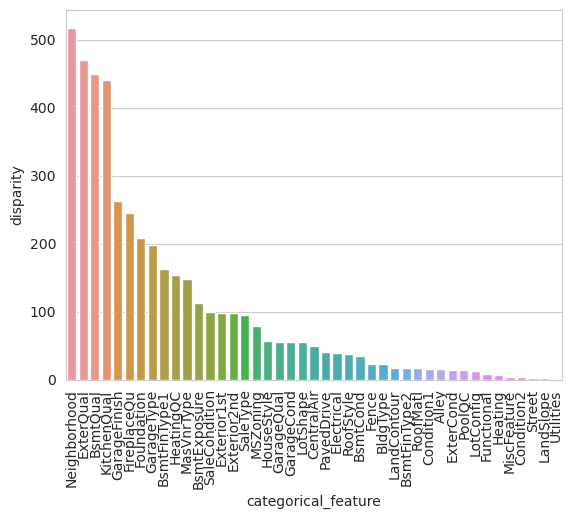

In [26]:
anova_result = anova(train_df)
anova_result['disparity'] = np.log(1./anova_result['p_value'].values)
sns.barplot(data=anova_result, x='categorical_feature', y='disparity')
x = plt.xticks(rotation=90)

> **Analysis** : We can observe here that *Neighborhood*, *ExterQual*, *BsmntQual* and *KitchenQual* have the most significant impact on our final sale price. Which would mean that people are intersted into the home's location and its room/exterior's quality.

# ⚙️ Target Encoding Categorical Values

The code below defines a function **target_encode()** which takes two arguments, *df* which is a pandas dataframe and *feature* which is a categorical feature to be target encoded.

The function creates a new dataframe *target_encoding* which will be used to store the target encoded values for each unique category in the input feature. It calculates the mean *SalePrice* for each category using pandas **groupby()** method and stores it in the *mean_target column* of the *target_encoding* dataframe. The *unique_values* column contains the unique categories in the input feature.

The *target_encoding* dataframe is then sorted based on the *mean_target* column and assigned a new column called *target_encoding* which contains the target encoded values. The encoding is done by assigning a value between **1** and **the number of unique categories** in the *feature* column, based on the sorted order of the *mean_target* column.

Finally, the target encoded values are assigned to the original *df* dataframe in a new column with the name *feature_encoded*. The function does not return any output.

In [27]:
def target_encode(df, feature):
    target_encoding = pd.DataFrame()
    target_encoding['unique_values'] = df[feature].unique()
    target_encoding.index = target_encoding.unique_values
    target_encoding['mean_target'] = df[[feature, 'SalePrice']].groupby(feature).mean()['SalePrice']
    target_encoding = target_encoding.sort_values('mean_target')
    target_encoding['target_encoding'] = range(1, target_encoding.shape[0]+1)
    target_encoding = target_encoding['target_encoding'].to_dict()
    
    for category, encoding in target_encoding.items():
        df.loc[df[feature] == category, feature+'_encoded'] = encoding

This code creates a list of target encoded categorical features by iterating over all the categorical features in the dataset *train_df*. For each feature, it calls the **target_encode** function which encodes the categories of the feature based on their mean target value and assigns the encoded values to a new column in *train_df*. 

The name of the new column is the name of the original categorical feature with *_encoded* appended to it. Finally, the list of target encoded categorical features and the *SalePrice* column are concatenated into *target_encoded_cols* and printed.

In [28]:
target_encoded_cols = []
for feature in cat_cols:  
    target_encode(train_df, feature)
    target_encoded_cols.append(feature+'_encoded')
target_encoded_cols.append('SalePrice')
print(target_encoded_cols)

['MSZoning_encoded', 'Street_encoded', 'Alley_encoded', 'LotShape_encoded', 'LandContour_encoded', 'Utilities_encoded', 'LotConfig_encoded', 'LandSlope_encoded', 'Neighborhood_encoded', 'Condition1_encoded', 'Condition2_encoded', 'BldgType_encoded', 'HouseStyle_encoded', 'RoofStyle_encoded', 'RoofMatl_encoded', 'Exterior1st_encoded', 'Exterior2nd_encoded', 'MasVnrType_encoded', 'ExterQual_encoded', 'ExterCond_encoded', 'Foundation_encoded', 'BsmtQual_encoded', 'BsmtCond_encoded', 'BsmtExposure_encoded', 'BsmtFinType1_encoded', 'BsmtFinType2_encoded', 'Heating_encoded', 'HeatingQC_encoded', 'CentralAir_encoded', 'Electrical_encoded', 'KitchenQual_encoded', 'Functional_encoded', 'FireplaceQu_encoded', 'GarageType_encoded', 'GarageFinish_encoded', 'GarageQual_encoded', 'GarageCond_encoded', 'PavedDrive_encoded', 'PoolQC_encoded', 'Fence_encoded', 'MiscFeature_encoded', 'SaleType_encoded', 'SaleCondition_encoded', 'SalePrice']


# 📊 Categorical Values Correlation Matrix

This block of code computes and visualizes the correlation matrix of the target-encoded categorical variables and the *SalePrice* variable in the house prices dataset.

First, the correlation matrix of the target-encoded categorical variables and *SalePrice* is computed using the **Pearson** correlation method. Then, the correlations are sorted in decreasing order with respect to the *SalePrice* variable. Only the features with a correlation of **0.5 or higher** are selected and plotted in the heatmap. 

The resulting plot shows the pairwise correlation coefficients between the selected features, with positive correlations in red, negative correlations in blue, and the intensity of the color indicating the strength of the correlation. The x-axis and y-axis show the names of the selected features.

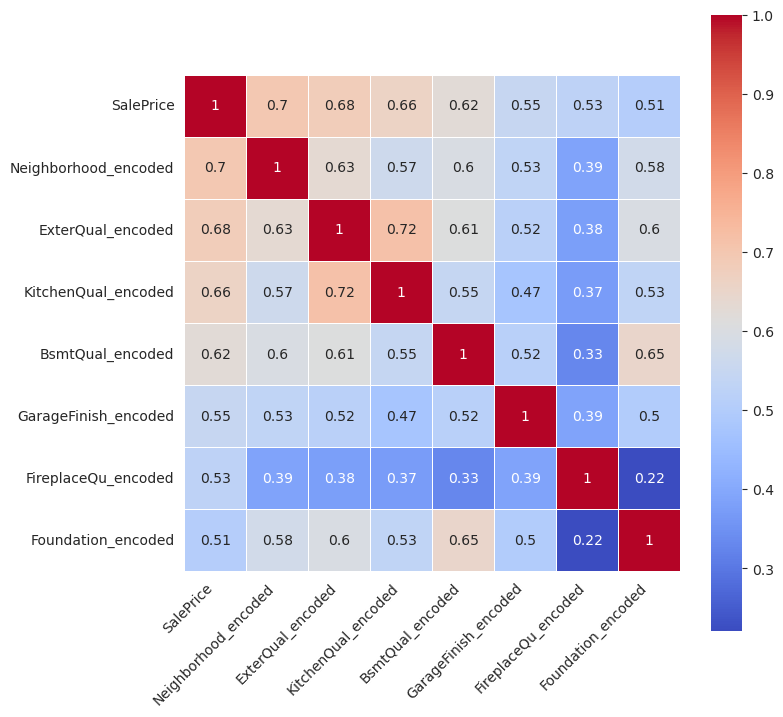

In [29]:
# compute the correlation matrix
cor_numVar = train_df[target_encoded_cols].corr(method='pearson')

# sort on decreasing correlations with SalePrice
cor_sorted = cor_numVar['SalePrice'].sort_values(ascending=False)

# select only high correlations
CorHigh = cor_sorted[abs(cor_sorted) > 0.5].index
cor_numVar = cor_numVar.loc[CorHigh, CorHigh]

# plot the correlation matrix
plt.figure(figsize=(8,8))
corrplot = sns.heatmap(cor_numVar, annot=True, cmap='coolwarm', square=True, linewidths=0.5, linecolor='white')
corrplot.set_xticklabels(corrplot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

> **Analysis** : We have 7 target encoded columns highly correlated (> 0.5) with our target value *Neighborhood* : *ExterQual*, *KitchenQual*, *BsmtQual*, *GarageFinish*, *FireplaceQu* and *Foundation*. Those values are also the 7 first values of our previous plot, that shows which categorical features have a significant impact on the target variable *SalePrice*.

In [30]:
target_encoded_cols.remove('SalePrice')

# 📊 Pairplots of Numerical and Target Encoded Categorical Variables

This function defines a custom plot that takes two variables, *x* and *y*, and plots a time series plot of *y* against *x*. The function first creates a time series DataFrame by combining *x* and *y* into two columns, *time* and *val*. Then, it groups the DataFrame by *time* and plots the resulting time series data. The plot is then returned. The function takes additional arguments using **\*\*kwargs**, which can be used to pass any additional arguments that can be passed to the plot function in pandas.

In [31]:
def pairplot(x, y, **kwargs):
    # Get current axes and create time series DataFrame
    ax = plt.gca()
    time_series = pd.DataFrame({'time': x, 'val': y})
    
    # Group by time and plot
    time_series = time_series.groupby('time').mean()
    time_series.plot(ax=ax)

This code generates a series of plots using the Seaborn library's **FacetGrid** to create a grid of scatterplots for each numerical variable and target-encoded categorical variable in the *train_df* DataFrame.

First, the numerical columns and the target-encoded categorical columns are combined into a single DataFrame using **pd.melt()**. The **id_vars** parameter specifies the columns that should remain unaltered, which in this case is only the *SalePrice* column.

Next, the **FacetGrid** object is created, specifying the *melted_df* DataFrame as the data source. The **col** parameter specifies the variable to be plotted on the x-axis of each subplot, and the **col_wrap** parameter specifies the maximum number of columns to use before wrapping to a new row. The **pairplot()** function is used as the plotting function for each subplot, which is defined above and plots a line plot of the *SalePrice* against the value of the variable being plotted.

The resulting grid of scatterplots allows for quick visual inspection of the relationships between each numerical and target-encoded categorical variables and the target variable *SalePrice*.

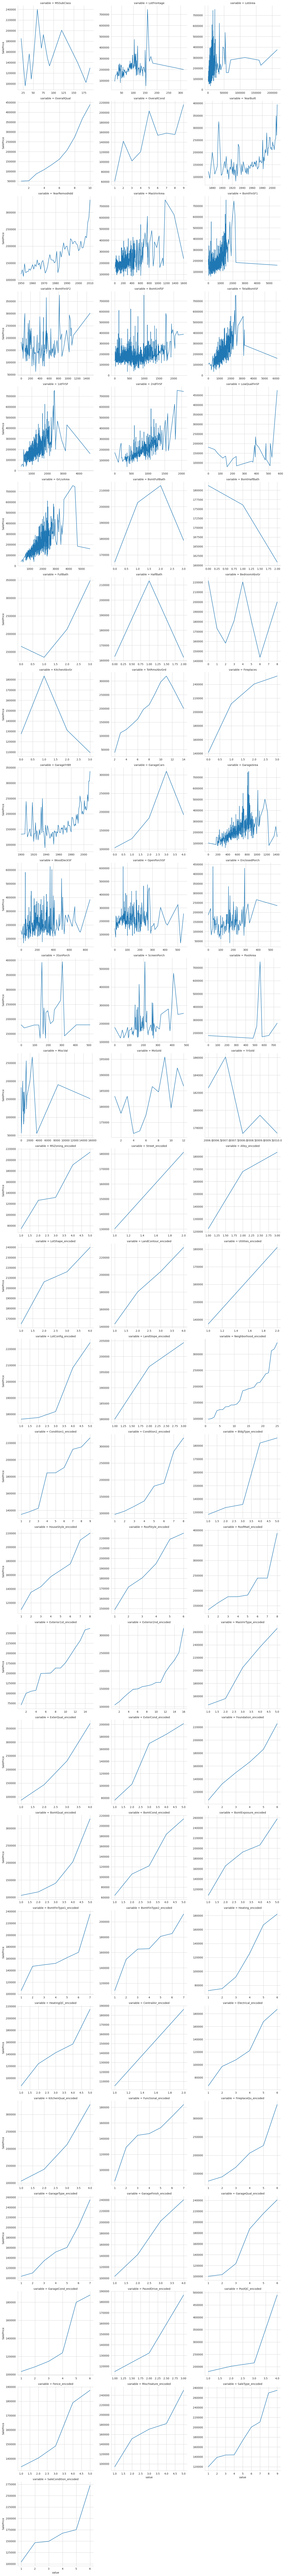

In [32]:
# Melt the DataFrame and create FacetGrid with pairplot for each variable
melted_df = pd.melt(train_df, id_vars=['SalePrice'], value_vars=num_cols.tolist() + target_encoded_cols)
facet_grid = sns.FacetGrid(melted_df, col="variable",  col_wrap=3, sharex=False, sharey=False, height=5)
facet_grid = facet_grid.map(pairplot, "value", "SalePrice")

> **Analysis** : There are many non-linear relationships between variables in the dataset. This means that the relationship between two variables cannot be represented by a straight line, but rather a curve or a polynomial function.
>
> Some variables such as *YearBuilt*, *1stFlrSF*, *2ndFlrSF*, and *Neighborhood_encoded*, may benefit from adding a quadratic term to the regression model. Adding a quadratic term allows the regression model to capture a non-linear relationship between the variables. However, too many polynomial terms can lead to overfitting.

# 📊 Clustering and Dimensionality Reduction

This block of code performs dimensionality reduction using **t-SNE** and **PCA** techniques, then applies **K-Means** clustering to the dataset in order to identify potential patterns and structure within the data. 

Specifically, it reduces the dataset to two dimensions using **t-SNE**, performs **PCA** on the standardized dataset, and applies **K-Means** clustering to the resulting principal components. 

Finally, it creates a scatter plot using the **t-SNE** coordinates, where each point is colored according to the cluster it belongs to. The amount of variance explained by the **PCA** is printed at the end.

Variance explained by the first 30 principal components : 0.75


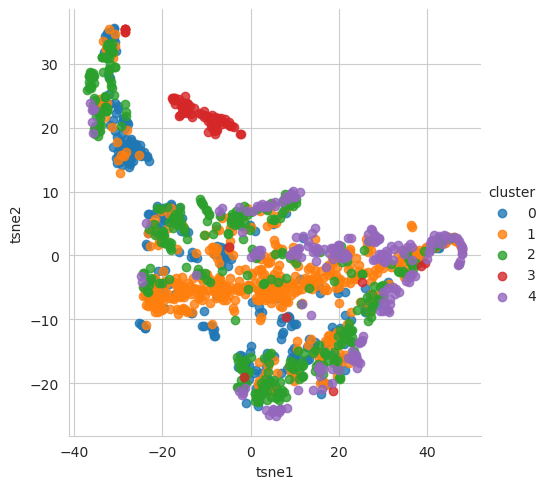

In [33]:
features = num_cols.tolist() + target_encoded_cols
model = TSNE(n_components=2, random_state=0, perplexity=50, init='random', learning_rate='auto')
X = train_df[features].fillna(0.).values
tsne = model.fit_transform(X)

std = StandardScaler()
s = std.fit_transform(X)
pca = PCA(n_components=30)
pca.fit(s)
pc = pca.transform(s)
kmeans = KMeans(n_clusters=5)
kmeans.fit(pc)

fr = pd.DataFrame({'tsne1': tsne[:,0], 'tsne2': tsne[:, 1], 'cluster': kmeans.labels_})
sns.lmplot(data=fr, x='tsne1', y='tsne2', hue='cluster', fit_reg=False)
print('Variance explained by the first 30 principal components : {:.2f}'.format(np.sum(pca.explained_variance_ratio_)))

> **Analysis** : The first 30 principal components explain 75% of the variance in the dataset. This suggests that there are some underlying patterns or correlations in the data, but it is not strong enough to warrant segmented regression.

# 📊 Feature Importance using a Random Forest Regressor

This code creates the training set *X* and the target variable *y* from the *train_df* dataframe. The features list is used to select the relevant columns from *train_df* for the *X* dataframe. Any missing values in *X* are then filled with zeros using the **fillna** method. The SalePrice column is assigned to *y*.

In [34]:
X = train_df[features].fillna(0.)
y = train_df['SalePrice']

We then create a random forest regression model and fit it to the training data. The random forest regression algorithm builds multiple decision trees and aggregates their predictions to obtain more accurate and stable predictions. In this case, the model is trained using the features stored in *X* (which have been filled with 0 values where necessary) and the target variable *SalePrice* stored in *y*.

In [35]:
model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

The feature importances are calculated using the **feature_importances_** attribute of the trained random forest model. These importances are then stored in a Pandas DataFrame with the column names *feature* and *importance*.

Next, the code selects only features with an importance greater than **0.005**, which is a set threshold used to narrow down the output to the most important features. Finally, the features are sorted by importance in descending order.

In [36]:
importances = model.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances = feature_importances[feature_importances['importance'] > 0.005]
feature_importances = feature_importances.sort_values('importance', ascending=False)

Finally, the feature importances are plotted using a horizontal bar chart with the seaborn barplot function, where the *importance* column is used for the x-axis, *feature* column is used for the y-axis, and the bars are sorted in descending order of *importance*. The x and y axis labels are also set using the **xlabel** and **ylabel** functions, respectively.

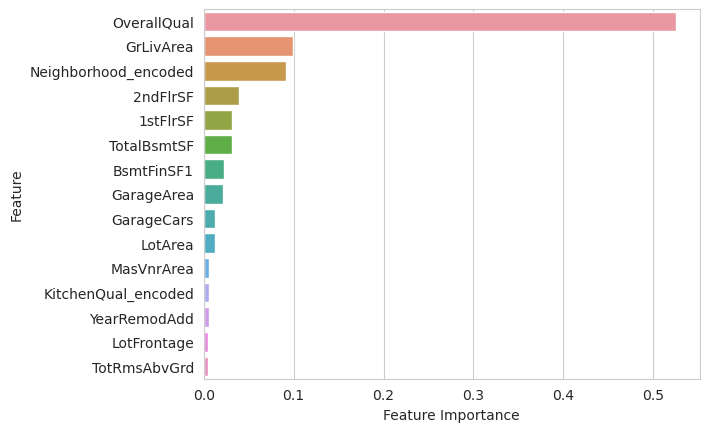

In [37]:
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

> **Analysis** : What we can observe here is that the RandomForest uses in majority the *OverallQual*, *GrLivArea* and *Neighborhood* features to predict the *SalePrice*. Those columns were the most correlated with *SalePrice* and seemed to be important features in our EDA, which is confirmed here.

# 📝 Note of the Author

Firstly, I would like to express my sincerest gratitude to all of you who took the time to read this notebook. I am a French engineering student studying Data Science and I am still inexperienced in this field. 

I am always looking to improve, and I would love to hear your thoughts on how I can make this notebook and/or predictive model even better. So please, feel free to reach out to me with any comments or suggestions. 

If you found this notebook helpful or interesting, please consider upvoting it. Your support means the world to me, and it will encourage me to continue sharing my work with the community.

Thank you once again for your time and for being a part of my learning journey. **--Lucas**

> #### Check out my other cool notebooks !
> - [🛳️ Titanic - Top 1% with KNN [0.81818]](https://www.kaggle.com/code/dreygaen/titanic-top-1-with-knn-0-81818)
> - [🛳️ Titanic EDA and Prediction [0.78229]](https://www.kaggle.com/code/dreygaen/titanic-eda-and-prediction-0-78229)